In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from statistics import mean 
import math
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
from numpy import median

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  

from sklearn.preprocessing import scale 

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.model_selection import train_test_split, cross_val_score 

In [4]:
dados_adv = pd.read_csv('dataset/Advertising.csv', index_col=0)
X = dados_adv.loc[:,['TV','radio','newspaper']]
y = dados_adv.loc[:,['sales']]

In [5]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Regressão Linear

In [7]:
linear = LinearRegression().fit(X_train,y_train)
r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))

print(linear.coef_)
print("Scores R^2 Treino:")
print("linear: "+str(r2_linear_treino))

print("Scores R^2 Teste:")
print("linear: "+str(r2_linear))

print(mean_squared_error(y_test,linear.predict(X_test))) 

[[0.04695205 0.17658644 0.00185115]]
Scores R^2 Treino:
linear: 0.8850053786777522
Scores R^2 Teste:
linear: 0.9224605706201435
1.9289249074665729


### Método Ridge
#### Alpha=0 regressão linear comum

In [8]:
ridge2 = Ridge(alpha = 0)
ridge2.fit(X_train, y_train) 

r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))
print(linear.coef_)
print("Scores R^2 Treino:")
print("linear: "+str(r2_linear_treino))


print("Scores R^2 Teste:")
print("linear: "+str(r2_linear))
print(mean_squared_error(y_test,linear.predict(X_test))) 

[[0.04695205 0.17658644 0.00185115]]
Scores R^2 Treino:
linear: 0.8850053786777522
Scores R^2 Teste:
linear: 0.9224605706201435
1.9289249074665729


In [10]:
ridge2 = Ridge(alpha = 0, normalize=True)
ridge2.fit(X_train, y_train) 

r2_linear = r2_score(y_test,linear.predict(X_test))
r2_linear_treino = r2_score(y_train,linear.predict(X_train))
print(linear.coef_)
print("Scores R^2 Treino:")
print("linear: "+str(r2_linear_treino))


print("Scores R^2 Teste:")
print("linear: "+str(r2_linear))
print(mean_squared_error(y_test,linear.predict(X_test))) 

[[0.04695205 0.17658644 0.00185115]]
Scores R^2 Treino:
linear: 0.8850053786777522
Scores R^2 Teste:
linear: 0.9224605706201435
1.9289249074665729


### Método Ridge
#### Utilizando diferentes valores de Alpha
#### A cada novo valor de Alpha, os valores dos parâmetros da função de regressão se aproxima de zero

In [11]:
alphas = 10**np.linspace(10,-2,100)*0.5
print(alphas)
print(alphas.shape)
print(alphas[1])
print(alphas[99])

[5.00000000e+09 3.78231664e+09 2.86118383e+09 2.16438064e+09
 1.63727458e+09 1.23853818e+09 9.36908711e+08 7.08737081e+08
 5.36133611e+08 4.05565415e+08 3.06795364e+08 2.32079442e+08
 1.75559587e+08 1.32804389e+08 1.00461650e+08 7.59955541e+07
 5.74878498e+07 4.34874501e+07 3.28966612e+07 2.48851178e+07
 1.88246790e+07 1.42401793e+07 1.07721735e+07 8.14875417e+06
 6.16423370e+06 4.66301673e+06 3.52740116e+06 2.66834962e+06
 2.01850863e+06 1.52692775e+06 1.15506485e+06 8.73764200e+05
 6.60970574e+05 5.00000000e+05 3.78231664e+05 2.86118383e+05
 2.16438064e+05 1.63727458e+05 1.23853818e+05 9.36908711e+04
 7.08737081e+04 5.36133611e+04 4.05565415e+04 3.06795364e+04
 2.32079442e+04 1.75559587e+04 1.32804389e+04 1.00461650e+04
 7.59955541e+03 5.74878498e+03 4.34874501e+03 3.28966612e+03
 2.48851178e+03 1.88246790e+03 1.42401793e+03 1.07721735e+03
 8.14875417e+02 6.16423370e+02 4.66301673e+02 3.52740116e+02
 2.66834962e+02 2.01850863e+02 1.52692775e+02 1.15506485e+02
 8.73764200e+01 6.609705

(100, 3)


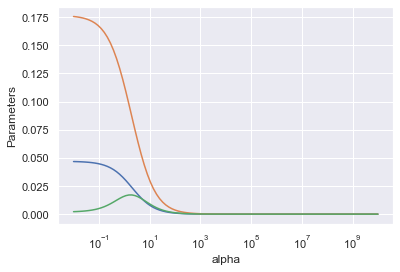

In [12]:
ridge = Ridge(normalize = True)
MSEs  = []
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train) 
    MSEs.append(mean_squared_error(y_test, ridge.predict(X_test)))    
    coefs.append(ridge.coef_)
    
#np.shape(coefs)
coefs2 = np.asarray(coefs)
coefs3 = coefs2.reshape(100,3)
print(np.shape(coefs3))

ax = plt.gca()
ax.plot(alphas*2, coefs3)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Parameters')
plt.show()

#### Comparando MSE com diferentes valores de Alpha

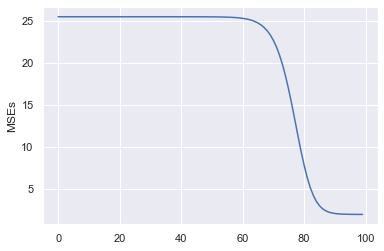

In [13]:
#plt.plot(alphas,MSEs)
plt.plot(MSEs)
plt.ylabel('MSEs')
plt.show()

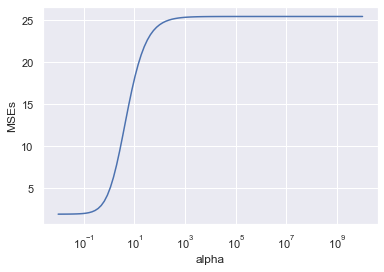

In [14]:
ax = plt.gca()
ax.plot(alphas*2, MSEs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSEs')
plt.show()

### Modelo com um alpha específico que apresentou valor baixo de MSE

In [16]:
ridge = Ridge(alpha = alphas[90], normalize = True)

ridge.fit(X_train, y_train) 
coefs = ridge.coef_
print(mean_squared_error(y_test,ridge.predict(X_test)))     
print(coefs)

2.0438844784736254
[[0.04423912 0.16481574 0.0056243 ]]


#### Modelo com um alpha específico que apresentou valor baixo de MSE
#### Coeficientes são diferentes dos coeficientes da regressão linear

### RidgeCV
#### Implementa busca por um alpha por meio de um critério de avaliação (score)
#### Documentação dos critérios de avaliação: https://scikit-learn.org/stable/modules/model_evaluation.html

In [17]:
ridgecv = RidgeCV(alphas = alphas)

#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
#ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_absolute_error', normalize = True)

ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)
print(ridgecv.coef_) # Print coefficients
print(mean_squared_error(y_test, ridgecv.predict(X_test)))          # Calculate the test MSE

266.8349615603151
[[0.04694319 0.17486394 0.00234117]]
1.9547758443014243


#### Método Lasso
#### Max_iter - número máximo de iterações

(100, 3)


Text(0, 0.5, 'weights')

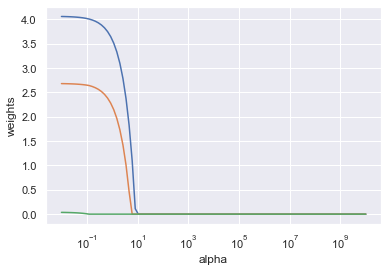

In [18]:
#lasso = Lasso(max_iter = 10000, normalize = True)
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
print(np.shape(coefs))

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [27]:
#lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv = LassoCV(alphas = alphas)#, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train.values.ravel())

print(lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))
print(lasso.coef_)

1.7555958671075638
2.026153314292101
[0.04679014 0.17009667 0.        ]


### Regularização para Árvore

In [28]:
tree = DecisionTreeRegressor().fit(X_train,y_train)
r2_tree = r2_score(y_test,tree.predict(X_test))
r2_tree_treino = r2_score(y_train,tree.predict(X_train))

print("Scores R^2 Treino:")
print("tree: "+str(r2_tree_treino))

print("Scores R^2 Teste:")
print("tree: "+str(r2_tree))

print(mean_squared_error(y_test,tree.predict(X_test))) 

Scores R^2 Treino:
tree: 1.0
Scores R^2 Teste:
tree: 0.9410291492115949
1.467


1.1645000000000005
1.0750000000000002


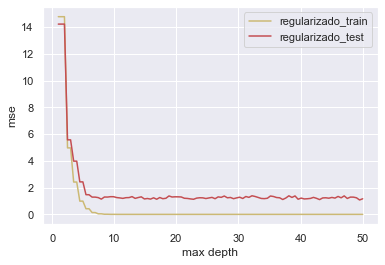

In [29]:
depth_test =  np.linspace(1., 50., num=100)

erros_train = []
erros_test = []
for depth in depth_test:
    #modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train.values.ravel())
    modelo_regularizado =  DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
    y_pred = modelo_regularizado.predict(X_test)
    erros_train.append(mean_squared_error(y_train, modelo_regularizado.predict(X_train)))
    erros_test.append(mean_squared_error(y_test, y_pred))
    lastMSE = mean_squared_error(y_test, y_pred)

print(lastMSE)
X_new = np.array(erros_test)

print(np.amin(X_new))
plt.plot(depth_test, erros_train,color='y',label='regularizado_train')
plt.plot(depth_test, erros_test,color='r',label='regularizado_test')   

plt.xlabel('max depth')
plt.ylabel('mse')
plt.legend()
plt.show()